# MO444A - PROJETO 3

Alunas:
*   Maria Tejada Begazo (RA 197488)
*   Nayara Ferreira da Silva (RA 223804)

# PART I - CODIGO

In [63]:
import os
import random
import numpy as np
import matplotlib.pyplot as plt

os.system('Xvfb :1 -screen 0 1600x1200x16  &')    # create virtual display with size 1600x1200 and 16 bit color. Color can be changed to 24 or 8
os.environ['DISPLAY']=':1.0'    # tell X clients to use our virtual DISPLAY :1.0

%cd search

[Errno 2] No such file or directory: 'search'
/home/mtejada/Desktop/PacamanML/197488_/search


## ALGORITMO GENETICO


Nós modelamos nosso algoritmo genetico esta modelado em que temos 4 opções básica determinadas por um if-then-else.
Onde nossos terminaies estão determinados por:

* d1: distancia entre o fantasma mas cercano. 
* d2: distancia entre la pildora mas cercana. 
* a1: escapar de un fantasma
* a2: ir a comer una pildora cercana
* a3: movimiento aleatorio. 

Ademáis vimos la opção de só ter como recompensa o score médio de 3 jogos seguidos. 
Nosso individuos estão formado por 8 parametros, por exemplo:

    [op, d1, d2, dist1, dist2, a1, a2, a3]

onde op se refiere à opção que pode ser de 1 à 4, depois d1 e d2 que se informo na parte de em cima, dist1 e dist2 podem estar no rango de 1 à 5 e a1, a2, a3 que se refierem às ações. 

Nosso crossver em dois pontos:

    parent1 =[1,| d1, d2, 3, 4, | a1, a2, a3]    => child1 =[1,| d2, d1, 1, 2, | a1, a2, a3] 
    
    parent2 =[3,| d2, d1, 1, 2, | a3, a2, a1]    => child2 =[3,| d1, d2, 3, 4, | a3, a2, a1]
    
A mutação esta determinado nos pontos que são enteiros, onde trocara o número de forma aleatoria. 


In [58]:
def initialization_of_population(size):
    op = [1, 2, 3, 4]
    d  = ['d1', 'd2']
    dis= [1, 2, 3, 4]
    a  = ['a1', 'a2', 'a3']
    
    popul = []
    for i in range(size):
        indiv = list(np.ones(len(op) + len(d) + len(dis) + len(a)))
        random.shuffle(op)
        random.shuffle(d)
        random.shuffle(dis)
        random.shuffle(a)
        indiv[0] = op[0]
        indiv[1:3] = d
        indiv[3] = dis[0]
        random.shuffle(dis)
        indiv[4] = dis[0]
        indiv[5:] = a
        popul.append(indiv.copy())
    return popul
        

In [59]:
def crossover_twopoints(parent1, parent2, PROBABILITY_CROSSOVER):
    child1 = parent1.copy()
    child2 = parent2.copy()
    probability = np.random.uniform(0,1)
    
    if probability < PROBABILITY_CROSSOVER:
        for i in range(1,5):
            child1[i] = parent2[i]
            child2[i] = parent1[i]
    return child1, child2

def mutation_point(indiv, PROBABILITY_MUTATION):
    index_mut = [0, 3, 4]
    random.shuffle(index_mut)
    probability = np.random.uniform(0,1)
    
    if probability < PROBABILITY_MUTATION:
        indiv[index_mut[0]] = random.randint(1,4)
    return indiv


In [60]:
def selection_tournament(population, scores):
    indx1 = random.randint(0, len(population)-1)
    indx2 = random.randint(0, len(population)-1)
    
    if scores[indx1] < scores[indx2]:
        return population[indx2]
    else:
        return population[indx1]

In [61]:
def algorithmGenetic(Environment, size, iteration, PROBABILITY_CROSSOVER, PROBABILITY_MUTATION):
    pop = initialization_of_population(size)
    
    nameFile = "GAindividual.txt"
    nameFileGeneration = "GAGeneration.txt"
    nameFileData = "GAData.txt"
    score_aver = []
    score_best = []
    score_pior = []
    
    dataFile = open(nameFileData, 'w')
    generationFile = open(nameFileGeneration, 'w')
    dataFile.write("Avr_better,Avr,Avr_pior\n")
    
    for i in range(iteration):
        score = []
        best_score = -99999
        best_Indx_indiv = 0
        
        for j in range(size):
            generationFile.write(str(i) + ",")
            for k in range(len(pop[j])):
                generationFile.write(str(pop[j][k]) + ",")
                
            with open(nameFile, 'w') as f:
                f.write(str(pop[j]))
                f.write("\n")
            
            p = ['layout:  smallClassic', 'Pacman died! Score: -482', 'Pacman died! Score: -412', 'Pacman died! Score: -410', 'Average Score: -434.6666666666667']
            if Environment == 0:
                p = !python3 pacman.py -n 3 -l smallClassic -p GAagents --agentArgs "tableMode=Small,f=GAindividual.txt"
            elif Environment == 1:
                p = !python3 pacman.py -n 3 -l mediumClassic -p GAagents --agentArgs "tableMode=Medium,f=GAindividual.txt"
            else:
                p = !python3 pacman.py -n 3 -l originalClassic -p GAagents --agentArgs "tableMode=Original,f=GAindividual.txt"
            
            print(p)
            score.append(int(float(p[4].split(' ')[2])))
            
            if(score[j]  > best_score):
                best_score = score[j]
                best_Indx_indiv = j
            
            generationFile.write(str(score[j]))
            generationFile.write('\n')
            generationFile.flush()
        
        q = pop.copy()
        indx = 0
        for j in range(int(size/2)):
            mom = selection_tournament(pop, score)
            dad = selection_tournament(pop, score)
            child1, child2 = crossover_twopoints(mom, dad, PROBABILITY_CROSSOVER)
            q[indx] = mutation_point(child1, PROBABILITY_MUTATION)
            q[indx+1] = child2
            indx+=2
        
        score_best.append(max(score))
        score_aver.append(sum(score)/size)
        score_pior.append(min(score))
        
        dataFile.write(str(max(score)) + "," + str(sum(score)/size) + "," + str(min(score)) + "\n")
        dataFile.flush()
        
        print(score_best, score_aver, score_pior)
        q[0] = pop[best_Indx_indiv]
        pop = q
    
    return pop[0],score_aver, score_best, score_pior


### Small Classic

Nós fizemos um aprendiçado com o mapa smallClassic (opcão 0) que tem 2 fantasmas, em cada geração temos 25 individuos e só aprendemos 50 gerações como uma probabilidade de crossover de 0.70 e mutação de 0.20. Internamente se faz 3 iterações por cada individuos e obtemos a media do score. Nosso fitness esta definido pelo score dado do jogo.

In [ ]:
bestInd, score_aver, score_best, score_pior = algorithmGenetic(0, 25,50, 0.70, 0.20 )

['layout:  smallClassic', 'Pacman died! Score: -461', 'Pacman died! Score: -426', 'Pacman died! Score: -424', 'Average Score: -437.0', 'Scores:        -461.0, -426.0, -424.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  smallClassic', 'Pacman died! Score: -456', 'Pacman died! Score: -442', 'Pacman died! Score: -458', 'Average Score: -452.0', 'Scores:        -456.0, -442.0, -458.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  smallClassic', 'Pacman died! Score: -337', 'Pacman died! Score: -438', 'Pacman died! Score: -349', 'Average Score: -374.6666666666667', 'Scores:        -337.0, -438.0, -349.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  smallClassic', 'Pacman died! Score: -383', 'Pacman died! Score: -152', 'Pacman died! Score: -356', 'Average Score: -297.0', 'Scores:        -383.0, -152.0, -356.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  smallClassic', 'P

['layout:  smallClassic', 'Pacman died! Score: -207', 'Pacman died! Score: -371', 'Pacman died! Score: -364', 'Average Score: -314.0', 'Scores:        -207.0, -371.0, -364.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  smallClassic', 'Pacman died! Score: -311', 'Pacman died! Score: -351', 'Pacman died! Score: -394', 'Average Score: -352.0', 'Scores:        -311.0, -351.0, -394.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  smallClassic', 'Pacman died! Score: -345', 'Pacman died! Score: -463', 'Pacman died! Score: -368', 'Average Score: -392.0', 'Scores:        -345.0, -463.0, -368.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  smallClassic', 'Pacman died! Score: -435', 'Pacman died! Score: -477', 'Pacman died! Score: -468', 'Average Score: -460.0', 'Scores:        -435.0, -477.0, -468.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  smallClassic', 'Pacman died! 

['layout:  smallClassic', 'Pacman died! Score: -377', 'Pacman died! Score: -345', 'Pacman died! Score: -422', 'Average Score: -381.3333333333333', 'Scores:        -377.0, -345.0, -422.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  smallClassic', 'Pacman died! Score: -215', 'Pacman died! Score: -423', 'Pacman died! Score: -372', 'Average Score: -336.6666666666667', 'Scores:        -215.0, -423.0, -372.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  smallClassic', 'Pacman died! Score: -490', 'Pacman died! Score: -482', 'Pacman died! Score: -425', 'Average Score: -465.6666666666667', 'Scores:        -490.0, -482.0, -425.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  smallClassic', 'Pacman died! Score: -367', 'Pacman died! Score: -113', 'Pacman died! Score: -384', 'Average Score: -288.0', 'Scores:        -367.0, -113.0, -384.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['la

['layout:  smallClassic', 'Pacman died! Score: -443', 'Pacman died! Score: -613', 'Pacman died! Score: -419', 'Average Score: -491.6666666666667', 'Scores:        -443.0, -613.0, -419.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  smallClassic', 'Pacman died! Score: -428', 'Pacman died! Score: -511', 'Pacman died! Score: -434', 'Average Score: -457.6666666666667', 'Scores:        -428.0, -511.0, -434.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  smallClassic', 'Pacman died! Score: -212', 'Pacman died! Score: -215', 'Pacman died! Score: -362', 'Average Score: -263.0', 'Scores:        -212.0, -215.0, -362.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  smallClassic', 'Pacman died! Score: -368', 'Pacman died! Score: -302', 'Pacman died! Score: -347', 'Average Score: -339.0', 'Scores:        -368.0, -302.0, -347.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  small

['layout:  smallClassic', 'Pacman died! Score: -149', 'Pacman died! Score: -340', 'Pacman died! Score: -355', 'Average Score: -281.3333333333333', 'Scores:        -149.0, -340.0, -355.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  smallClassic', 'Pacman died! Score: -119', 'Pacman died! Score: -368', 'Pacman died! Score: -356', 'Average Score: -281.0', 'Scores:        -119.0, -368.0, -356.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  smallClassic', 'Pacman died! Score: -365', 'Pacman died! Score: -345', 'Pacman died! Score: -335', 'Average Score: -348.3333333333333', 'Scores:        -365.0, -345.0, -335.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  smallClassic', 'Pacman died! Score: -348', 'Pacman died! Score: -387', 'Pacman died! Score: -376', 'Average Score: -370.3333333333333', 'Scores:        -348.0, -387.0, -376.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['la

['layout:  smallClassic', 'Pacman died! Score: -428', 'Pacman died! Score: -304', 'Pacman died! Score: -388', 'Average Score: -373.3333333333333', 'Scores:        -428.0, -304.0, -388.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  smallClassic', 'Pacman died! Score: 49', 'Pacman died! Score: -224', 'Pacman died! Score: -121', 'Average Score: -98.66666666666667', 'Scores:        49.0, -224.0, -121.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  smallClassic', 'Pacman died! Score: -157', 'Pacman died! Score: -381', 'Pacman died! Score: -337', 'Average Score: -291.6666666666667', 'Scores:        -157.0, -381.0, -337.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  smallClassic', 'Pacman died! Score: -340', 'Pacman died! Score: -331', 'Pacman died! Score: -313', 'Average Score: -328.0', 'Scores:        -340.0, -331.0, -313.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout

['layout:  smallClassic', 'Pacman died! Score: -312', 'Pacman died! Score: -356', 'Pacman died! Score: -436', 'Average Score: -368.0', 'Scores:        -312.0, -356.0, -436.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  smallClassic', 'Pacman died! Score: -365', 'Pacman died! Score: -315', 'Pacman died! Score: -365', 'Average Score: -348.3333333333333', 'Scores:        -365.0, -315.0, -365.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  smallClassic', 'Pacman died! Score: -341', 'Pacman died! Score: -258', 'Pacman died! Score: -429', 'Average Score: -342.6666666666667', 'Scores:        -341.0, -258.0, -429.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  smallClassic', 'Pacman died! Score: -347', 'Pacman died! Score: -337', 'Pacman died! Score: -149', 'Average Score: -277.6666666666667', 'Scores:        -347.0, -337.0, -149.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['la

['layout:  smallClassic', 'Pacman died! Score: -355', 'Pacman died! Score: -163', 'Pacman died! Score: -494', 'Average Score: -337.3333333333333', 'Scores:        -355.0, -163.0, -494.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  smallClassic', 'Pacman died! Score: -46', 'Pacman died! Score: -80', 'Pacman died! Score: -320', 'Average Score: -148.66666666666666', 'Scores:        -46.0, -80.0, -320.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  smallClassic', 'Pacman died! Score: -334', 'Pacman died! Score: -348', 'Pacman died! Score: -338', 'Average Score: -340.0', 'Scores:        -334.0, -348.0, -338.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  smallClassic', 'Pacman died! Score: -347', 'Pacman died! Score: -22', 'Pacman died! Score: -186', 'Average Score: -185.0', 'Scores:        -347.0, -22.0, -186.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  smallClass

['layout:  smallClassic', 'Pacman died! Score: -318', 'Pacman died! Score: -359', 'Pacman died! Score: -386', 'Average Score: -354.3333333333333', 'Scores:        -318.0, -359.0, -386.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  smallClassic', 'Pacman died! Score: -499', 'Pacman died! Score: -240', 'Pacman died! Score: -374', 'Average Score: -371.0', 'Scores:        -499.0, -240.0, -374.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  smallClassic', 'Pacman died! Score: -339', 'Pacman died! Score: -150', 'Pacman died! Score: -392', 'Average Score: -293.6666666666667', 'Scores:        -339.0, -150.0, -392.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  smallClassic', 'Pacman died! Score: -329', 'Pacman died! Score: -321', 'Pacman died! Score: -432', 'Average Score: -360.6666666666667', 'Scores:        -329.0, -321.0, -432.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['la

['layout:  smallClassic', 'Pacman died! Score: -429', 'Pacman died! Score: -480', 'Pacman died! Score: -435', 'Average Score: -448.0', 'Scores:        -429.0, -480.0, -435.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
[-216, -191, -251, -224, 144, -210, 153, 285, -193, 93, 142, 145] [-406.88, -369.76, -377.28, -355.48, -332.24, -325.68, -303.48, -273.2, -319.64, -299.12, -313.08, -288.64] [-482, -478, -502, -466, -491, -471, -450, -469, -482, -457, -485, -448]
['layout:  smallClassic', 'Pacman died! Score: -478', 'Pacman died! Score: -381', 'Pacman died! Score: -313', 'Average Score: -390.6666666666667', 'Scores:        -478.0, -381.0, -313.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  smallClassic', 'Pacman died! Score: -357', 'Pacman died! Score: -377', 'Pacman died! Score: -353', 'Average Score: -362.3333333333333', 'Scores:        -357.0, -377.0, -353.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:

['layout:  smallClassic', 'Pacman died! Score: -451', 'Pacman died! Score: -337', 'Pacman died! Score: -372', 'Average Score: -386.6666666666667', 'Scores:        -451.0, -337.0, -372.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  smallClassic', 'Pacman died! Score: -341', 'Pacman died! Score: -445', 'Pacman died! Score: -158', 'Average Score: -314.6666666666667', 'Scores:        -341.0, -445.0, -158.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  smallClassic', 'Pacman died! Score: -311', 'Pacman died! Score: -120', 'Pacman died! Score: -368', 'Average Score: -266.3333333333333', 'Scores:        -311.0, -120.0, -368.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  smallClassic', 'Pacman died! Score: -433', 'Pacman died! Score: -302', 'Pacman died! Score: -174', 'Average Score: -303.0', 'Scores:        -433.0, -302.0, -174.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['la

['layout:  smallClassic', 'Pacman died! Score: -136', 'Pacman died! Score: -435', 'Pacman died! Score: -311', 'Average Score: -294.0', 'Scores:        -136.0, -435.0, -311.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  smallClassic', 'Pacman died! Score: -144', 'Pacman died! Score: -349', 'Pacman died! Score: -181', 'Average Score: -224.66666666666666', 'Scores:        -144.0, -349.0, -181.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  smallClassic', 'Pacman died! Score: -391', 'Pacman died! Score: -172', 'Pacman died! Score: -127', 'Average Score: -230.0', 'Scores:        -391.0, -172.0, -127.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  smallClassic', 'Pacman died! Score: -321', 'Pacman died! Score: -377', 'Pacman died! Score: -147', 'Average Score: -281.6666666666667', 'Scores:        -321.0, -377.0, -147.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  smal

['layout:  smallClassic', 'Pacman died! Score: -383', 'Pacman died! Score: -402', 'Pacman died! Score: -297', 'Average Score: -360.6666666666667', 'Scores:        -383.0, -402.0, -297.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  smallClassic', 'Pacman died! Score: -347', 'Pacman died! Score: -347', 'Pacman died! Score: -338', 'Average Score: -344.0', 'Scores:        -347.0, -347.0, -338.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  smallClassic', 'Pacman died! Score: -311', 'Pacman died! Score: -356', 'Pacman died! Score: -386', 'Average Score: -351.0', 'Scores:        -311.0, -356.0, -386.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  smallClassic', 'Pacman died! Score: -313', 'Pacman died! Score: -381', 'Pacman died! Score: -337', 'Average Score: -343.6666666666667', 'Scores:        -313.0, -381.0, -337.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  small

['layout:  smallClassic', 'Pacman died! Score: -354', 'Pacman died! Score: -203', 'Pacman died! Score: -365', 'Average Score: -307.3333333333333', 'Scores:        -354.0, -203.0, -365.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  smallClassic', 'Pacman died! Score: -360', 'Pacman died! Score: -354', 'Pacman died! Score: -307', 'Average Score: -340.3333333333333', 'Scores:        -360.0, -354.0, -307.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  smallClassic', 'Pacman died! Score: -330', 'Pacman died! Score: -380', 'Pacman died! Score: -339', 'Average Score: -349.6666666666667', 'Scores:        -330.0, -380.0, -339.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  smallClassic', 'Pacman died! Score: -329', 'Pacman died! Score: -353', 'Pacman died! Score: -351', 'Average Score: -344.3333333333333', 'Scores:        -329.0, -353.0, -351.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss,

['layout:  smallClassic', 'Pacman died! Score: 71', 'Pacman died! Score: -347', 'Pacman died! Score: -381', 'Average Score: -219.0', 'Scores:        71.0, -347.0, -381.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  smallClassic', 'Pacman died! Score: -317', 'Pacman died! Score: -344', 'Pacman died! Score: -347', 'Average Score: -336.0', 'Scores:        -317.0, -344.0, -347.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  smallClassic', 'Pacman died! Score: -339', 'Pacman died! Score: -366', 'Pacman died! Score: -313', 'Average Score: -339.3333333333333', 'Scores:        -339.0, -366.0, -313.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  smallClassic', 'Pacman died! Score: -158', 'Pacman died! Score: -312', 'Pacman died! Score: -350', 'Average Score: -273.3333333333333', 'Scores:        -158.0, -312.0, -350.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  smallClas

['layout:  smallClassic', 'Pacman died! Score: -385', 'Pacman died! Score: -369', 'Pacman died! Score: -338', 'Average Score: -364.0', 'Scores:        -385.0, -369.0, -338.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  smallClassic', 'Pacman died! Score: -339', 'Pacman died! Score: -458', 'Pacman died! Score: -393', 'Average Score: -396.6666666666667', 'Scores:        -339.0, -458.0, -393.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  smallClassic', 'Pacman died! Score: -344', 'Pacman died! Score: -409', 'Pacman died! Score: -383', 'Average Score: -378.6666666666667', 'Scores:        -344.0, -409.0, -383.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  smallClassic', 'Pacman died! Score: -352', 'Pacman died! Score: -431', 'Pacman died! Score: -302', 'Average Score: -361.6666666666667', 'Scores:        -352.0, -431.0, -302.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['la

['layout:  smallClassic', 'Pacman died! Score: -344', 'Pacman died! Score: -143', 'Pacman died! Score: -349', 'Average Score: -278.6666666666667', 'Scores:        -344.0, -143.0, -349.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  smallClassic', 'Pacman died! Score: -447', 'Pacman died! Score: -229', 'Pacman died! Score: -302', 'Average Score: -326.0', 'Scores:        -447.0, -229.0, -302.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  smallClassic', 'Pacman died! Score: -388', 'Pacman died! Score: -296', 'Pacman died! Score: -337', 'Average Score: -340.3333333333333', 'Scores:        -388.0, -296.0, -337.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  smallClassic', 'Pacman died! Score: -364', 'Pacman died! Score: -383', 'Pacman died! Score: -474', 'Average Score: -407.0', 'Scores:        -364.0, -383.0, -474.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
[-216, -191, -25

['layout:  smallClassic', 'Pacman died! Score: -341', 'Pacman died! Score: -199', 'Pacman died! Score: -360', 'Average Score: -300.0', 'Scores:        -341.0, -199.0, -360.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  smallClassic', 'Pacman died! Score: -324', 'Pacman died! Score: -372', 'Pacman died! Score: -349', 'Average Score: -348.3333333333333', 'Scores:        -324.0, -372.0, -349.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  smallClassic', 'Pacman died! Score: -311', 'Pacman died! Score: -379', 'Pacman died! Score: -357', 'Average Score: -349.0', 'Scores:        -311.0, -379.0, -357.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  smallClassic', 'Pacman died! Score: -365', 'Pacman died! Score: -148', 'Pacman died! Score: -178', 'Average Score: -230.33333333333334', 'Scores:        -365.0, -148.0, -178.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  smal

['layout:  smallClassic', 'Pacman died! Score: -117', 'Pacman died! Score: -304', 'Pacman died! Score: -312', 'Average Score: -244.33333333333334', 'Scores:        -117.0, -304.0, -312.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  smallClassic', 'Pacman died! Score: -322', 'Pacman died! Score: -159', 'Pacman died! Score: -369', 'Average Score: -283.3333333333333', 'Scores:        -322.0, -159.0, -369.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  smallClassic', 'Pacman died! Score: -424', 'Pacman died! Score: -356', 'Pacman died! Score: -386', 'Average Score: -388.6666666666667', 'Scores:        -424.0, -356.0, -386.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  smallClassic', 'Pacman died! Score: -179', 'Pacman died! Score: -553', 'Pacman died! Score: -348', 'Average Score: -360.0', 'Scores:        -179.0, -553.0, -348.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['l

['layout:  smallClassic', 'Pacman died! Score: -357', 'Pacman died! Score: -384', 'Pacman died! Score: -362', 'Average Score: -367.6666666666667', 'Scores:        -357.0, -384.0, -362.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  smallClassic', 'Pacman died! Score: -313', 'Pacman died! Score: -159', 'Pacman died! Score: -357', 'Average Score: -276.3333333333333', 'Scores:        -313.0, -159.0, -357.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  smallClassic', 'Pacman died! Score: -368', 'Pacman died! Score: -224', 'Pacman died! Score: -349', 'Average Score: -313.6666666666667', 'Scores:        -368.0, -224.0, -349.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  smallClassic', 'Pacman died! Score: -404', 'Pacman died! Score: 20', 'Pacman died! Score: -356', 'Average Score: -246.66666666666666', 'Scores:        -404.0, 20.0, -356.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Lo

['layout:  smallClassic', 'Pacman died! Score: -356', 'Pacman died! Score: -149', 'Pacman died! Score: -380', 'Average Score: -295.0', 'Scores:        -356.0, -149.0, -380.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  smallClassic', 'Pacman died! Score: -137', 'Pacman died! Score: -324', 'Pacman died! Score: -358', 'Average Score: -273.0', 'Scores:        -137.0, -324.0, -358.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  smallClassic', 'Pacman died! Score: -369', 'Pacman died! Score: -367', 'Pacman died! Score: -372', 'Average Score: -369.3333333333333', 'Scores:        -369.0, -367.0, -372.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  smallClassic', 'Pacman died! Score: -312', 'Pacman died! Score: -356', 'Pacman died! Score: -68', 'Average Score: -245.33333333333334', 'Scores:        -312.0, -356.0, -68.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  smallC

['layout:  smallClassic', 'Pacman died! Score: -329', 'Pacman died! Score: -366', 'Pacman died! Score: -67', 'Average Score: -254.0', 'Scores:        -329.0, -366.0, -67.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  smallClassic', 'Pacman died! Score: -99', 'Pacman died! Score: -153', 'Pacman died! Score: -308', 'Average Score: -186.66666666666666', 'Scores:        -99.0, -153.0, -308.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  smallClassic', 'Pacman died! Score: -72', 'Pacman died! Score: -312', 'Pacman died! Score: -314', 'Average Score: -232.66666666666666', 'Scores:        -72.0, -312.0, -314.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  smallClassic', 'Pacman died! Score: -68', 'Pacman died! Score: -59', 'Pacman died! Score: -356', 'Average Score: -161.0', 'Scores:        -68.0, -59.0, -356.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  smallClassic'

['layout:  smallClassic', 'Pacman died! Score: -183', 'Pacman died! Score: -371', 'Pacman died! Score: -361', 'Average Score: -305.0', 'Scores:        -183.0, -371.0, -361.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  smallClassic', 'Pacman died! Score: -126', 'Pacman died! Score: -305', 'Pacman died! Score: -124', 'Average Score: -185.0', 'Scores:        -126.0, -305.0, -124.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  smallClassic', 'Pacman died! Score: -111', 'Pacman died! Score: -154', 'Pacman died! Score: -320', 'Average Score: -195.0', 'Scores:        -111.0, -154.0, -320.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  smallClassic', 'Pacman died! Score: -384', 'Pacman died! Score: -357', 'Pacman died! Score: -359', 'Average Score: -366.6666666666667', 'Scores:        -384.0, -357.0, -359.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  smallClassic', 'P

['layout:  smallClassic', 'Pacman died! Score: 67', 'Pacman died! Score: 57', 'Pacman died! Score: -324', 'Average Score: -66.66666666666667', 'Scores:        67.0, 57.0, -324.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  smallClassic', 'Pacman died! Score: -225', 'Pacman died! Score: -359', 'Pacman died! Score: -397', 'Average Score: -327.0', 'Scores:        -225.0, -359.0, -397.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  smallClassic', 'Pacman died! Score: -349', 'Pacman died! Score: -374', 'Pacman died! Score: -297', 'Average Score: -340.0', 'Scores:        -349.0, -374.0, -297.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  smallClassic', 'Pacman died! Score: -366', 'Pacman died! Score: -335', 'Pacman died! Score: -356', 'Average Score: -352.3333333333333', 'Scores:        -366.0, -335.0, -356.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  smallClassic'

['layout:  smallClassic', 'Pacman died! Score: -344', 'Pacman died! Score: -114', 'Pacman died! Score: -333', 'Average Score: -263.6666666666667', 'Scores:        -344.0, -114.0, -333.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  smallClassic', 'Pacman died! Score: -247', 'Pacman died! Score: -295', 'Pacman died! Score: -377', 'Average Score: -306.3333333333333', 'Scores:        -247.0, -295.0, -377.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  smallClassic', 'Pacman died! Score: -368', 'Pacman died! Score: -349', 'Pacman died! Score: -140', 'Average Score: -285.6666666666667', 'Scores:        -368.0, -349.0, -140.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  smallClassic', 'Pacman died! Score: -343', 'Pacman died! Score: 105', 'Pacman died! Score: -365', 'Average Score: -201.0', 'Scores:        -343.0, 105.0, -365.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layo

['layout:  smallClassic', 'Pacman died! Score: -455', 'Pacman died! Score: -332', 'Pacman died! Score: -442', 'Average Score: -409.6666666666667', 'Scores:        -455.0, -332.0, -442.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
[-216, -191, -251, -224, 144, -210, 153, 285, -193, 93, 142, 145, -103, -232, 223, 72, 347, 5, 650, -102, -142, 222, 204, 138, 227, -146, -185, -120, 212, 141, -131, -127] [-406.88, -369.76, -377.28, -355.48, -332.24, -325.68, -303.48, -273.2, -319.64, -299.12, -313.08, -288.64, -305.36, -329.72, -265.68, -317.44, -297.88, -305.68, -259.52, -308.44, -286.56, -292.8, -301.64, -293.4, -280.36, -313.72, -297.32, -284.12, -284.24, -277.56, -295.28, -307.0] [-482, -478, -502, -466, -491, -471, -450, -469, -482, -457, -485, -448, -409, -467, -400, -466, -469, -473, -402, -408, -453, -432, -447, -406, -419, -452, -385, -383, -427, -439, -442, -409]
['layout:  smallClassic', 'Pacman died! Score: -347', 'Pacman died! Score: -311', 'Pacman died! Sc

['layout:  smallClassic', 'Pacman died! Score: -369', 'Pacman died! Score: -347', 'Pacman died! Score: -332', 'Average Score: -349.3333333333333', 'Scores:        -369.0, -347.0, -332.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  smallClassic', 'Pacman died! Score: -346', 'Pacman died! Score: -374', 'Pacman died! Score: -362', 'Average Score: -360.6666666666667', 'Scores:        -346.0, -374.0, -362.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  smallClassic', 'Pacman died! Score: -368', 'Pacman died! Score: -350', 'Pacman died! Score: -334', 'Average Score: -350.6666666666667', 'Scores:        -368.0, -350.0, -334.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  smallClassic', 'Pacman died! Score: -378', 'Pacman died! Score: -335', 'Pacman died! Score: -341', 'Average Score: -351.3333333333333', 'Scores:        -378.0, -335.0, -341.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss,

['layout:  smallClassic', 'Pacman died! Score: -315', 'Pacman died! Score: -305', 'Pacman died! Score: -348', 'Average Score: -322.6666666666667', 'Scores:        -315.0, -305.0, -348.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  smallClassic', 'Pacman died! Score: -412', 'Pacman died! Score: -327', 'Pacman died! Score: -403', 'Average Score: -380.6666666666667', 'Scores:        -412.0, -327.0, -403.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  smallClassic', 'Pacman died! Score: -123', 'Pacman died! Score: -336', 'Pacman died! Score: -341', 'Average Score: -266.6666666666667', 'Scores:        -123.0, -336.0, -341.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  smallClassic', 'Pacman died! Score: -379', 'Pacman died! Score: -342', 'Pacman died! Score: -178', 'Average Score: -299.6666666666667', 'Scores:        -379.0, -342.0, -178.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss,

['layout:  smallClassic', 'Pacman died! Score: -138', 'Pacman died! Score: -355', 'Pacman died! Score: -356', 'Average Score: -283.0', 'Scores:        -138.0, -355.0, -356.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  smallClassic', 'Pacman died! Score: -377', 'Pacman died! Score: -154', 'Pacman died! Score: -317', 'Average Score: -282.6666666666667', 'Scores:        -377.0, -154.0, -317.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  smallClassic', 'Pacman died! Score: -360', 'Pacman died! Score: -401', 'Pacman died! Score: -348', 'Average Score: -369.6666666666667', 'Scores:        -360.0, -401.0, -348.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  smallClassic', 'Pacman died! Score: -320', 'Pacman died! Score: -347', 'Pacman died! Score: -340', 'Average Score: -335.6666666666667', 'Scores:        -320.0, -347.0, -340.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['la

['layout:  smallClassic', 'Pacman died! Score: -347', 'Pacman died! Score: -357', 'Pacman died! Score: -303', 'Average Score: -335.6666666666667', 'Scores:        -347.0, -357.0, -303.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  smallClassic', 'Pacman died! Score: -329', 'Pacman died! Score: -165', 'Pacman died! Score: -343', 'Average Score: -279.0', 'Scores:        -329.0, -165.0, -343.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  smallClassic', 'Pacman died! Score: -225', 'Pacman died! Score: -336', 'Pacman died! Score: -360', 'Average Score: -307.0', 'Scores:        -225.0, -336.0, -360.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  smallClassic', 'Pacman died! Score: 69', 'Pacman died! Score: -374', 'Pacman died! Score: -344', 'Average Score: -216.33333333333334', 'Scores:        69.0, -374.0, -344.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  smallCla

['layout:  smallClassic', 'Pacman died! Score: -352', 'Pacman died! Score: -350', 'Pacman died! Score: -315', 'Average Score: -339.0', 'Scores:        -352.0, -350.0, -315.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  smallClassic', 'Pacman died! Score: -372', 'Pacman died! Score: -373', 'Pacman died! Score: -322', 'Average Score: -355.6666666666667', 'Scores:        -372.0, -373.0, -322.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  smallClassic', 'Pacman died! Score: -320', 'Pacman died! Score: -385', 'Pacman died! Score: -358', 'Average Score: -354.3333333333333', 'Scores:        -320.0, -385.0, -358.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  smallClassic', 'Pacman died! Score: -394', 'Pacman died! Score: -299', 'Pacman died! Score: -376', 'Average Score: -356.3333333333333', 'Scores:        -394.0, -299.0, -376.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['la

['layout:  smallClassic', 'Pacman died! Score: -317', 'Pacman died! Score: -441', 'Pacman died! Score: -146', 'Average Score: -301.3333333333333', 'Scores:        -317.0, -441.0, -146.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  smallClassic', 'Pacman died! Score: -167', 'Pacman died! Score: -417', 'Pacman died! Score: -341', 'Average Score: -308.3333333333333', 'Scores:        -167.0, -417.0, -341.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  smallClassic', 'Pacman died! Score: -340', 'Pacman died! Score: -28', 'Pacman died! Score: -300', 'Average Score: -222.66666666666666', 'Scores:        -340.0, -28.0, -300.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  smallClassic', 'Pacman died! Score: -392', 'Pacman died! Score: -317', 'Pacman died! Score: -174', 'Average Score: -294.3333333333333', 'Scores:        -392.0, -317.0, -174.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, 

['layout:  smallClassic', 'Pacman died! Score: -493', 'Pacman died! Score: -481', 'Pacman died! Score: -444', 'Average Score: -472.6666666666667', 'Scores:        -493.0, -481.0, -444.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  smallClassic', 'Pacman died! Score: -371', 'Pacman died! Score: -322', 'Pacman died! Score: -384', 'Average Score: -359.0', 'Scores:        -371.0, -322.0, -384.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  smallClassic', 'Pacman died! Score: -376', 'Pacman died! Score: -365', 'Pacman died! Score: -334', 'Average Score: -358.3333333333333', 'Scores:        -376.0, -365.0, -334.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  smallClassic', 'Pacman died! Score: -331', 'Pacman died! Score: -322', 'Pacman died! Score: -310', 'Average Score: -321.0', 'Scores:        -331.0, -322.0, -310.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  small

['layout:  smallClassic', 'Pacman died! Score: -319', 'Pacman died! Score: 60', 'Pacman died! Score: -381', 'Average Score: -213.33333333333334', 'Scores:        -319.0, 60.0, -381.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  smallClassic', 'Pacman died! Score: -318', 'Pacman died! Score: -365', 'Pacman died! Score: -493', 'Average Score: -392.0', 'Scores:        -318.0, -365.0, -493.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  smallClassic', 'Pacman died! Score: -76', 'Pacman died! Score: -162', 'Pacman died! Score: -364', 'Average Score: -200.66666666666666', 'Scores:        -76.0, -162.0, -364.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  smallClassic', 'Pacman died! Score: -315', 'Pacman died! Score: 59', 'Pacman died! Score: -369', 'Average Score: -208.33333333333334', 'Scores:        -315.0, 59.0, -369.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  

['layout:  smallClassic', 'Pacman died! Score: -444', 'Pacman died! Score: -401', 'Pacman died! Score: -348', 'Average Score: -397.6666666666667', 'Scores:        -444.0, -401.0, -348.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  smallClassic', 'Pacman died! Score: -372', 'Pacman died! Score: -356', 'Pacman died! Score: -323', 'Average Score: -350.3333333333333', 'Scores:        -372.0, -356.0, -323.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  smallClassic', 'Pacman died! Score: -351', 'Pacman died! Score: -346', 'Pacman died! Score: -289', 'Average Score: -328.6666666666667', 'Scores:        -351.0, -346.0, -289.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  smallClassic', 'Pacman died! Score: -348', 'Pacman died! Score: -127', 'Pacman died! Score: -321', 'Average Score: -265.3333333333333', 'Scores:        -348.0, -127.0, -321.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss,

['layout:  smallClassic', 'Pacman died! Score: -359', 'Pacman died! Score: -419', 'Pacman died! Score: -331', 'Average Score: -369.6666666666667', 'Scores:        -359.0, -419.0, -331.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  smallClassic', 'Pacman died! Score: -199', 'Pacman died! Score: -345', 'Pacman died! Score: -139', 'Average Score: -227.66666666666666', 'Scores:        -199.0, -345.0, -139.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  smallClassic', 'Pacman died! Score: -36', 'Pacman died! Score: -22', 'Pacman died! Score: -335', 'Average Score: -131.0', 'Scores:        -36.0, -22.0, -335.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  smallClassic', 'Pacman died! Score: 109', 'Pacman died! Score: -419', 'Pacman died! Score: -371', 'Average Score: -227.0', 'Scores:        109.0, -419.0, -371.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  smallClass

['layout:  smallClassic', 'Pacman died! Score: -418', 'Pacman died! Score: -395', 'Pacman died! Score: -508', 'Average Score: -440.3333333333333', 'Scores:        -418.0, -395.0, -508.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  smallClassic', 'Pacman died! Score: -487', 'Pacman died! Score: -486', 'Pacman died! Score: -528', 'Average Score: -500.3333333333333', 'Scores:        -487.0, -486.0, -528.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  smallClassic', 'Pacman died! Score: -451', 'Pacman died! Score: -403', 'Pacman died! Score: -356', 'Average Score: -403.3333333333333', 'Scores:        -451.0, -403.0, -356.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  smallClassic', 'Pacman died! Score: -388', 'Pacman died! Score: -197', 'Pacman died! Score: -377', 'Average Score: -320.6666666666667', 'Scores:        -388.0, -197.0, -377.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss,

['layout:  smallClassic', 'Pacman died! Score: -329', 'Pacman died! Score: -365', 'Pacman died! Score: -384', 'Average Score: -359.3333333333333', 'Scores:        -329.0, -365.0, -384.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']


In [ ]:
plt.plot(score_best, label="Best Score")
plt.plot(score_aver, label="Average Score")
plt.plot(score_pior, label="Pior Score")
plt.xlabel("Generation")
plt.ylabel("Score")
plt.legend()

print("Melhor individuo", bestInd)

### Medium Classic

Nós fizemos um aprendiçado com o mapa mediumClassic (opcão 1) que tem 2 fantasmas, em cada geração temos 25 individuos e só aprendemos 50 gerações como uma probabilidade de crossover de 0.70 e mutação de 0.20. Internamente se faz 3 iterações por cada individuos e obtemos a media do score. Nosso fitness esta definido pelo score dado do jogo.

In [62]:
bestInd, score_aver, score_best, score_pior = algorithmGenetic(1, 25,50, 0.70, 0.20 )

['layout:  mediumClassic', 'Pacman died! Score: -389', 'Pacman died! Score: -491', 'Pacman died! Score: -381', 'Average Score: -420.3333333333333', 'Scores:        -389.0, -491.0, -381.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  mediumClassic', 'Pacman died! Score: -433', 'Pacman died! Score: -451', 'Pacman died! Score: -488', 'Average Score: -457.3333333333333', 'Scores:        -433.0, -451.0, -488.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  mediumClassic', 'Pacman died! Score: -469', 'Pacman died! Score: -465', 'Pacman died! Score: -466', 'Average Score: -466.6666666666667', 'Scores:        -469.0, -465.0, -466.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  mediumClassic', 'Pacman died! Score: -445', 'Pacman died! Score: -450', 'Pacman died! Score: -468', 'Average Score: -454.3333333333333', 'Scores:        -445.0, -450.0, -468.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, L

['layout:  mediumClassic', 'Pacman died! Score: -436', 'Pacman died! Score: -504', 'Pacman died! Score: -314', 'Average Score: -418.0', 'Scores:        -436.0, -504.0, -314.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  mediumClassic', 'Pacman died! Score: -306', 'Pacman died! Score: -486', 'Pacman died! Score: -383', 'Average Score: -391.6666666666667', 'Scores:        -306.0, -486.0, -383.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  mediumClassic', 'Pacman died! Score: -159', 'Pacman died! Score: -316', 'Pacman died! Score: -283', 'Average Score: -252.66666666666666', 'Scores:        -159.0, -316.0, -283.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  mediumClassic', 'Pacman died! Score: -477', 'Pacman died! Score: -517', 'Pacman died! Score: -466', 'Average Score: -486.6666666666667', 'Scores:        -477.0, -517.0, -466.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']

['layout:  mediumClassic', 'Pacman died! Score: -319', 'Pacman died! Score: -412', 'Pacman died! Score: -199', 'Average Score: -310.0', 'Scores:        -319.0, -412.0, -199.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  mediumClassic', 'Pacman died! Score: -177', 'Pacman died! Score: -227', 'Pacman died! Score: -247', 'Average Score: -217.0', 'Scores:        -177.0, -227.0, -247.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  mediumClassic', 'Pacman died! Score: -577', 'Pacman died! Score: -101', 'Pacman died! Score: -302', 'Average Score: -326.6666666666667', 'Scores:        -577.0, -101.0, -302.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  mediumClassic', 'Pacman died! Score: -459', 'Pacman died! Score: -464', 'Pacman died! Score: -375', 'Average Score: -432.6666666666667', 'Scores:        -459.0, -464.0, -375.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  m

['layout:  mediumClassic', 'Pacman died! Score: -504', 'Pacman died! Score: -380', 'Pacman died! Score: -388', 'Average Score: -424.0', 'Scores:        -504.0, -380.0, -388.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
[-199, -148, -155, -65] [-404.08, -382.28, -361.8, -302.2] [-596, -570, -533, -530]
['layout:  mediumClassic', 'Pacman died! Score: -69', 'Pacman died! Score: -206', 'Pacman died! Score: -145', 'Average Score: -140.0', 'Scores:        -69.0, -206.0, -145.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  mediumClassic', 'Pacman died! Score: 13', 'Pacman died! Score: -333', 'Pacman died! Score: -275', 'Average Score: -198.33333333333334', 'Scores:        13.0, -333.0, -275.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  mediumClassic', 'Pacman died! Score: -366', 'Pacman died! Score: -206', 'Pacman died! Score: -284', 'Average Score: -285.3333333333333', 'Scores:        -366.0, -206.0, -284.0

['layout:  mediumClassic', 'Pacman died! Score: -287', 'Pacman died! Score: -387', 'Pacman died! Score: -310', 'Average Score: -328.0', 'Scores:        -287.0, -387.0, -310.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  mediumClassic', 'Pacman died! Score: -382', 'Pacman died! Score: -157', 'Pacman died! Score: -358', 'Average Score: -299.0', 'Scores:        -382.0, -157.0, -358.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  mediumClassic', 'Pacman died! Score: -306', 'Pacman died! Score: 63', 'Pacman died! Score: -414', 'Average Score: -219.0', 'Scores:        -306.0, 63.0, -414.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  mediumClassic', 'Pacman died! Score: -167', 'Pacman died! Score: -402', 'Pacman died! Score: -447', 'Average Score: -338.6666666666667', 'Scores:        -167.0, -402.0, -447.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  mediumClassic', '

['layout:  mediumClassic', 'Pacman died! Score: -82', 'Pacman died! Score: -224', 'Pacman died! Score: -396', 'Average Score: -234.0', 'Scores:        -82.0, -224.0, -396.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  mediumClassic', 'Pacman died! Score: -134', 'Pacman died! Score: -362', 'Pacman died! Score: -194', 'Average Score: -230.0', 'Scores:        -134.0, -362.0, -194.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  mediumClassic', 'Pacman died! Score: -115', 'Pacman died! Score: -390', 'Pacman died! Score: 266', 'Average Score: -79.66666666666667', 'Scores:        -115.0, -390.0, 266.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  mediumClassic', 'Pacman died! Score: 23', 'Pacman died! Score: -319', 'Pacman died! Score: -352', 'Average Score: -216.0', 'Scores:        23.0, -319.0, -352.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  mediumClassic', 'Pacm

['layout:  mediumClassic', 'Pacman died! Score: -318', 'Pacman died! Score: 465', 'Pacman died! Score: 204', 'Average Score: 117.0', 'Scores:        -318.0, 465.0, 204.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  mediumClassic', 'Pacman died! Score: -545', 'Pacman died! Score: -455', 'Pacman died! Score: -451', 'Average Score: -483.6666666666667', 'Scores:        -545.0, -455.0, -451.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
[-199, -148, -155, -65, -110, -83, -59, 117] [-404.08, -382.28, -361.8, -302.2, -272.36, -256.16, -240.04, -267.52] [-596, -570, -533, -530, -473, -438, -403, -483]
['layout:  mediumClassic', 'Pacman died! Score: -98', 'Pacman died! Score: 175', 'Pacman died! Score: -172', 'Average Score: -31.666666666666668', 'Scores:        -98.0, 175.0, -172.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  mediumClassic', 'Pacman died! Score: -403', 'Pacman died! Score: -368', 'Pacman died!

['layout:  mediumClassic', 'Pacman died! Score: -116', 'Pacman died! Score: -100', 'Pacman died! Score: -219', 'Average Score: -145.0', 'Scores:        -116.0, -100.0, -219.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  mediumClassic', 'Pacman died! Score: -186', 'Pacman died! Score: -277', 'Pacman died! Score: -253', 'Average Score: -238.66666666666666', 'Scores:        -186.0, -277.0, -253.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  mediumClassic', 'Pacman died! Score: -387', 'Pacman died! Score: -378', 'Pacman died! Score: -422', 'Average Score: -395.6666666666667', 'Scores:        -387.0, -378.0, -422.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  mediumClassic', 'Pacman died! Score: -100', 'Pacman died! Score: -78', 'Pacman died! Score: 110', 'Average Score: -22.666666666666668', 'Scores:        -100.0, -78.0, 110.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['

['layout:  mediumClassic', 'Pacman died! Score: -96', 'Pacman died! Score: -173', 'Pacman died! Score: -362', 'Average Score: -210.33333333333334', 'Scores:        -96.0, -173.0, -362.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  mediumClassic', 'Pacman died! Score: -169', 'Pacman died! Score: -394', 'Pacman died! Score: -247', 'Average Score: -270.0', 'Scores:        -169.0, -394.0, -247.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  mediumClassic', 'Pacman died! Score: -391', 'Pacman died! Score: -53', 'Pacman died! Score: -367', 'Average Score: -270.3333333333333', 'Scores:        -391.0, -53.0, -367.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  mediumClassic', 'Pacman died! Score: -259', 'Pacman died! Score: -399', 'Pacman died! Score: -554', 'Average Score: -404.0', 'Scores:        -259.0, -399.0, -554.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  medi

['layout:  mediumClassic', 'Pacman died! Score: -168', 'Pacman died! Score: -126', 'Pacman died! Score: -65', 'Average Score: -119.66666666666667', 'Scores:        -168.0, -126.0, -65.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  mediumClassic', 'Pacman died! Score: -267', 'Pacman died! Score: -288', 'Pacman died! Score: -170', 'Average Score: -241.66666666666666', 'Scores:        -267.0, -288.0, -170.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  mediumClassic', 'Pacman died! Score: -163', 'Pacman died! Score: -234', 'Pacman died! Score: -196', 'Average Score: -197.66666666666666', 'Scores:        -163.0, -234.0, -196.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  mediumClassic', 'Pacman died! Score: -476', 'Pacman died! Score: -453', 'Pacman died! Score: -466', 'Average Score: -465.0', 'Scores:        -476.0, -453.0, -466.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']

['layout:  mediumClassic', 'Pacman died! Score: -222', 'Pacman died! Score: -398', 'Pacman died! Score: -390', 'Average Score: -336.6666666666667', 'Scores:        -222.0, -398.0, -390.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  mediumClassic', 'Pacman died! Score: -243', 'Pacman died! Score: -237', 'Pacman died! Score: -168', 'Average Score: -216.0', 'Scores:        -243.0, -237.0, -168.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  mediumClassic', 'Pacman died! Score: -287', 'Pacman died! Score: -327', 'Pacman died! Score: 83', 'Average Score: -177.0', 'Scores:        -287.0, -327.0, 83.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  mediumClassic', 'Pacman died! Score: -278', 'Pacman died! Score: -203', 'Pacman died! Score: -316', 'Average Score: -265.6666666666667', 'Scores:        -278.0, -203.0, -316.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  mediu

['layout:  mediumClassic', 'Pacman died! Score: -158', 'Pacman died! Score: -319', 'Pacman died! Score: 186', 'Average Score: -97.0', 'Scores:        -158.0, -319.0, 186.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  mediumClassic', 'Pacman died! Score: -292', 'Pacman died! Score: 291', 'Pacman died! Score: 153', 'Average Score: 50.666666666666664', 'Scores:        -292.0, 291.0, 153.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  mediumClassic', 'Pacman died! Score: -378', 'Pacman died! Score: -15', 'Pacman died! Score: -368', 'Average Score: -253.66666666666666', 'Scores:        -378.0, -15.0, -368.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  mediumClassic', 'Pacman died! Score: -217', 'Pacman died! Score: -178', 'Pacman died! Score: -246', 'Average Score: -213.66666666666666', 'Scores:        -217.0, -178.0, -246.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layou

['layout:  mediumClassic', 'Pacman died! Score: -287', 'Pacman died! Score: 1', 'Pacman died! Score: 32', 'Average Score: -84.66666666666667', 'Scores:        -287.0, 1.0, 32.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  mediumClassic', 'Pacman died! Score: -390', 'Pacman died! Score: -344', 'Pacman died! Score: -257', 'Average Score: -330.3333333333333', 'Scores:        -390.0, -344.0, -257.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  mediumClassic', 'Pacman died! Score: -262', 'Pacman died! Score: 19', 'Pacman died! Score: -310', 'Average Score: -184.33333333333334', 'Scores:        -262.0, 19.0, -310.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  mediumClassic', 'Pacman died! Score: -172', 'Pacman died! Score: -366', 'Pacman died! Score: -328', 'Average Score: -288.6666666666667', 'Scores:        -172.0, -366.0, -328.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
[

['layout:  mediumClassic', 'Pacman died! Score: -476', 'Pacman died! Score: -484', 'Pacman died! Score: -475', 'Average Score: -478.3333333333333', 'Scores:        -476.0, -484.0, -475.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
[-199, -148, -155, -65, -110, -83, -59, 117, -21, -22, -70, -88, -104, -34, 50, -18, 12] [-404.08, -382.28, -361.8, -302.2, -272.36, -256.16, -240.04, -267.52, -215.52, -255.92, -237.0, -226.6, -282.44, -253.08, -234.76, -254.04, -255.84] [-596, -570, -533, -530, -473, -438, -403, -483, -439, -479, -404, -465, -481, -476, -453, -482, -478]
['layout:  mediumClassic', 'Pacman died! Score: -306', 'Pacman died! Score: -307', 'Pacman died! Score: -69', 'Average Score: -227.33333333333334', 'Scores:        -306.0, -307.0, -69.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  mediumClassic', 'Pacman died! Score: -320', 'Pacman died! Score: -75', 'Pacman died! Score: -397', 'Average Score: -264.0', 'Scores:        -3

['layout:  mediumClassic', 'Pacman died! Score: -190', 'Pacman died! Score: -17', 'Pacman died! Score: -406', 'Average Score: -204.33333333333334', 'Scores:        -190.0, -17.0, -406.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  mediumClassic', 'Pacman died! Score: -378', 'Pacman died! Score: -169', 'Pacman died! Score: -330', 'Average Score: -292.3333333333333', 'Scores:        -378.0, -169.0, -330.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  mediumClassic', 'Pacman died! Score: -161', 'Pacman died! Score: -391', 'Pacman died! Score: -276', 'Average Score: -276.0', 'Scores:        -161.0, -391.0, -276.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  mediumClassic', 'Pacman died! Score: -201', 'Pacman died! Score: -473', 'Pacman died! Score: -275', 'Average Score: -316.3333333333333', 'Scores:        -201.0, -473.0, -275.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
[

['layout:  mediumClassic', 'Pacman died! Score: -168', 'Pacman died! Score: -374', 'Pacman died! Score: -56', 'Average Score: -199.33333333333334', 'Scores:        -168.0, -374.0, -56.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  mediumClassic', 'Pacman died! Score: -211', 'Pacman died! Score: -361', 'Pacman died! Score: -422', 'Average Score: -331.3333333333333', 'Scores:        -211.0, -361.0, -422.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  mediumClassic', 'Pacman died! Score: -391', 'Pacman died! Score: -374', 'Pacman died! Score: -372', 'Average Score: -379.0', 'Scores:        -391.0, -374.0, -372.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  mediumClassic', 'Pacman died! Score: -344', 'Pacman died! Score: 205', 'Pacman died! Score: -76', 'Average Score: -71.66666666666667', 'Scores:        -344.0, 205.0, -76.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['lay

['layout:  mediumClassic', 'Pacman died! Score: -225', 'Pacman died! Score: -274', 'Pacman died! Score: 44', 'Average Score: -151.66666666666666', 'Scores:        -225.0, -274.0, 44.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  mediumClassic', 'Pacman died! Score: -389', 'Pacman died! Score: -420', 'Pacman died! Score: -164', 'Average Score: -324.3333333333333', 'Scores:        -389.0, -420.0, -164.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  mediumClassic', 'Pacman died! Score: -333', 'Pacman died! Score: 15', 'Pacman died! Score: -391', 'Average Score: -236.33333333333334', 'Scores:        -333.0, 15.0, -391.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  mediumClassic', 'Pacman died! Score: -168', 'Pacman died! Score: -491', 'Pacman died! Score: -478', 'Average Score: -379.0', 'Scores:        -168.0, -491.0, -478.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layo

['layout:  mediumClassic', 'Pacman died! Score: -221', 'Pacman died! Score: -373', 'Pacman died! Score: -402', 'Average Score: -332.0', 'Scores:        -221.0, -373.0, -402.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  mediumClassic', 'Pacman died! Score: -283', 'Pacman died! Score: -100', 'Pacman died! Score: -178', 'Average Score: -187.0', 'Scores:        -283.0, -100.0, -178.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  mediumClassic', 'Pacman died! Score: -47', 'Pacman died! Score: -268', 'Pacman died! Score: -384', 'Average Score: -233.0', 'Scores:        -47.0, -268.0, -384.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  mediumClassic', 'Pacman died! Score: -103', 'Pacman died! Score: -414', 'Pacman died! Score: -195', 'Average Score: -237.33333333333334', 'Scores:        -103.0, -414.0, -195.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  mediumClassic'

['layout:  mediumClassic', 'Pacman died! Score: -237', 'Pacman died! Score: -196', 'Pacman died! Score: -189', 'Average Score: -207.33333333333334', 'Scores:        -237.0, -196.0, -189.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  mediumClassic', 'Pacman died! Score: -389', 'Pacman died! Score: -369', 'Pacman died! Score: 95', 'Average Score: -221.0', 'Scores:        -389.0, -369.0, 95.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  mediumClassic', 'Pacman died! Score: -401', 'Pacman died! Score: -320', 'Pacman died! Score: -162', 'Average Score: -294.3333333333333', 'Scores:        -401.0, -320.0, -162.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  mediumClassic', 'Pacman died! Score: -303', 'Pacman died! Score: -364', 'Pacman died! Score: -180', 'Average Score: -282.3333333333333', 'Scores:        -303.0, -364.0, -180.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['l

['layout:  mediumClassic', 'Pacman died! Score: -83', 'Pacman died! Score: -184', 'Pacman died! Score: -289', 'Average Score: -185.33333333333334', 'Scores:        -83.0, -184.0, -289.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  mediumClassic', 'Pacman died! Score: -25', 'Pacman died! Score: -118', 'Pacman died! Score: -193', 'Average Score: -112.0', 'Scores:        -25.0, -118.0, -193.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  mediumClassic', 'Pacman died! Score: -2', 'Pacman died! Score: -98', 'Pacman died! Score: -352', 'Average Score: -150.66666666666666', 'Scores:        -2.0, -98.0, -352.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  mediumClassic', 'Pacman died! Score: -298', 'Pacman died! Score: -391', 'Pacman died! Score: -316', 'Average Score: -335.0', 'Scores:        -298.0, -391.0, -316.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  mediumCla

['layout:  mediumClassic', 'Pacman died! Score: -269', 'Pacman died! Score: -382', 'Pacman died! Score: -307', 'Average Score: -319.3333333333333', 'Scores:        -269.0, -382.0, -307.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  mediumClassic', 'Pacman died! Score: -160', 'Pacman died! Score: 11', 'Pacman died! Score: 80', 'Average Score: -23.0', 'Scores:        -160.0, 11.0, 80.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  mediumClassic', 'Pacman died! Score: -308', 'Pacman died! Score: -317', 'Pacman died! Score: -449', 'Average Score: -358.0', 'Scores:        -308.0, -317.0, -449.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  mediumClassic', 'Pacman died! Score: -488', 'Pacman died! Score: -524', 'Pacman died! Score: -457', 'Average Score: -489.6666666666667', 'Scores:        -488.0, -524.0, -457.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
[-199, -148, -155, -6

['layout:  mediumClassic', 'Pacman died! Score: 183', 'Pacman died! Score: -163', 'Pacman died! Score: -357', 'Average Score: -112.33333333333333', 'Scores:        183.0, -163.0, -357.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  mediumClassic', 'Pacman died! Score: -358', 'Pacman died! Score: -244', 'Pacman died! Score: -401', 'Average Score: -334.3333333333333', 'Scores:        -358.0, -244.0, -401.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  mediumClassic', 'Pacman died! Score: -414', 'Pacman died! Score: -227', 'Pacman died! Score: -378', 'Average Score: -339.6666666666667', 'Scores:        -414.0, -227.0, -378.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  mediumClassic', 'Pacman died! Score: -244', 'Pacman died! Score: -204', 'Pacman died! Score: -77', 'Average Score: -175.0', 'Scores:        -244.0, -204.0, -77.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['l

['layout:  mediumClassic', 'Pacman died! Score: -371', 'Pacman died! Score: -362', 'Pacman died! Score: -317', 'Average Score: -350.0', 'Scores:        -371.0, -362.0, -317.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  mediumClassic', 'Pacman died! Score: -273', 'Pacman died! Score: -24', 'Pacman died! Score: -502', 'Average Score: -266.3333333333333', 'Scores:        -273.0, -24.0, -502.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  mediumClassic', 'Pacman died! Score: -131', 'Pacman died! Score: -137', 'Pacman died! Score: -121', 'Average Score: -129.66666666666666', 'Scores:        -131.0, -137.0, -121.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  mediumClassic', 'Pacman died! Score: -305', 'Pacman died! Score: -357', 'Pacman died! Score: -313', 'Average Score: -325.0', 'Scores:        -305.0, -357.0, -313.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  me

['layout:  mediumClassic', 'Pacman died! Score: -263', 'Pacman died! Score: -105', 'Pacman died! Score: -414', 'Average Score: -260.6666666666667', 'Scores:        -263.0, -105.0, -414.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  mediumClassic', 'Pacman died! Score: -166', 'Pacman died! Score: -508', 'Pacman died! Score: -141', 'Average Score: -271.6666666666667', 'Scores:        -166.0, -508.0, -141.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  mediumClassic', 'Pacman died! Score: -205', 'Pacman died! Score: -170', 'Pacman died! Score: -445', 'Average Score: -273.3333333333333', 'Scores:        -205.0, -170.0, -445.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  mediumClassic', 'Pacman died! Score: -375', 'Pacman died! Score: -272', 'Pacman died! Score: -332', 'Average Score: -326.3333333333333', 'Scores:        -375.0, -272.0, -332.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, L

['layout:  mediumClassic', 'Pacman died! Score: -221', 'Pacman died! Score: -59', 'Pacman died! Score: -439', 'Average Score: -239.66666666666666', 'Scores:        -221.0, -59.0, -439.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  mediumClassic', 'Pacman died! Score: -253', 'Pacman died! Score: -414', 'Pacman died! Score: -413', 'Average Score: -360.0', 'Scores:        -253.0, -414.0, -413.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  mediumClassic', 'Pacman died! Score: -297', 'Pacman died! Score: -414', 'Pacman died! Score: -17', 'Average Score: -242.66666666666666', 'Scores:        -297.0, -414.0, -17.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  mediumClassic', 'Pacman died! Score: -413', 'Pacman died! Score: -199', 'Pacman died! Score: -410', 'Average Score: -340.6666666666667', 'Scores:        -413.0, -199.0, -410.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['

['layout:  mediumClassic', 'Pacman died! Score: -458', 'Pacman died! Score: -472', 'Pacman died! Score: -503', 'Average Score: -477.6666666666667', 'Scores:        -458.0, -472.0, -503.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
[-199, -148, -155, -65, -110, -83, -59, 117, -21, -22, -70, -88, -104, -34, 50, -18, 12, -39, -78, -35, -49, -75, -57, -81, -45, 66, -22, -82, -60, -14, -92, -16] [-404.08, -382.28, -361.8, -302.2, -272.36, -256.16, -240.04, -267.52, -215.52, -255.92, -237.0, -226.6, -282.44, -253.08, -234.76, -254.04, -255.84, -260.64, -239.68, -234.6, -237.28, -263.0, -250.64, -233.88, -226.48, -259.0, -254.08, -246.28, -245.2, -232.84, -270.72, -223.32] [-596, -570, -533, -530, -473, -438, -403, -483, -439, -479, -404, -465, -481, -476, -453, -482, -478, -530, -423, -445, -379, -519, -471, -457, -419, -511, -469, -433, -482, -386, -460, -477]
['layout:  mediumClassic', 'Pacman died! Score: -86', 'Pacman died! Score: -168', 'Pacman died! Score: -155', 

['layout:  mediumClassic', 'Pacman died! Score: -190', 'Pacman died! Score: -77', 'Pacman died! Score: -167', 'Average Score: -144.66666666666666', 'Scores:        -190.0, -77.0, -167.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  mediumClassic', 'Pacman died! Score: -170', 'Pacman died! Score: -267', 'Pacman died! Score: -385', 'Average Score: -274.0', 'Scores:        -170.0, -267.0, -385.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  mediumClassic', 'Pacman died! Score: -205', 'Pacman died! Score: -406', 'Pacman died! Score: -42', 'Average Score: -217.66666666666666', 'Scores:        -205.0, -406.0, -42.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  mediumClassic', 'Pacman died! Score: -138', 'Pacman died! Score: -352', 'Pacman died! Score: -252', 'Average Score: -247.33333333333334', 'Scores:        -138.0, -352.0, -252.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
[

['layout:  mediumClassic', 'Pacman died! Score: 38', 'Pacman died! Score: -276', 'Pacman died! Score: -303', 'Average Score: -180.33333333333334', 'Scores:        38.0, -276.0, -303.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  mediumClassic', 'Pacman died! Score: -166', 'Pacman died! Score: 20', 'Pacman died! Score: -284', 'Average Score: -143.33333333333334', 'Scores:        -166.0, 20.0, -284.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  mediumClassic', 'Pacman died! Score: -247', 'Pacman died! Score: -217', 'Pacman died! Score: -86', 'Average Score: -183.33333333333334', 'Scores:        -247.0, -217.0, -86.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  mediumClassic', 'Pacman died! Score: -390', 'Pacman died! Score: -317', 'Pacman died! Score: -377', 'Average Score: -361.3333333333333', 'Scores:        -390.0, -317.0, -377.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Lo

['layout:  mediumClassic', 'Pacman died! Score: -64', 'Pacman died! Score: -382', 'Pacman died! Score: -308', 'Average Score: -251.33333333333334', 'Scores:        -64.0, -382.0, -308.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  mediumClassic', 'Pacman died! Score: -277', 'Pacman died! Score: -391', 'Pacman died! Score: -258', 'Average Score: -308.6666666666667', 'Scores:        -277.0, -391.0, -258.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  mediumClassic', 'Pacman died! Score: -227', 'Pacman died! Score: -143', 'Pacman died! Score: -108', 'Average Score: -159.33333333333334', 'Scores:        -227.0, -143.0, -108.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  mediumClassic', 'Pacman died! Score: -167', 'Pacman died! Score: -373', 'Pacman died! Score: -242', 'Average Score: -260.6666666666667', 'Scores:        -167.0, -373.0, -242.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, L

['layout:  mediumClassic', 'Pacman died! Score: -232', 'Pacman died! Score: -302', 'Pacman died! Score: -364', 'Average Score: -299.3333333333333', 'Scores:        -232.0, -302.0, -364.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  mediumClassic', 'Pacman died! Score: -351', 'Pacman died! Score: -337', 'Pacman died! Score: -294', 'Average Score: -327.3333333333333', 'Scores:        -351.0, -337.0, -294.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  mediumClassic', 'Pacman died! Score: -405', 'Pacman died! Score: -191', 'Pacman died! Score: -362', 'Average Score: -319.3333333333333', 'Scores:        -405.0, -191.0, -362.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  mediumClassic', 'Pacman died! Score: -206', 'Pacman died! Score: -374', 'Pacman died! Score: -211', 'Average Score: -263.6666666666667', 'Scores:        -206.0, -374.0, -211.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, L

['layout:  mediumClassic', 'Pacman died! Score: -18', 'Pacman died! Score: -255', 'Pacman died! Score: -209', 'Average Score: -160.66666666666666', 'Scores:        -18.0, -255.0, -209.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  mediumClassic', 'Pacman died! Score: -292', 'Pacman died! Score: -189', 'Pacman died! Score: -276', 'Average Score: -252.33333333333334', 'Scores:        -292.0, -189.0, -276.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  mediumClassic', 'Pacman died! Score: -122', 'Pacman died! Score: -73', 'Pacman died! Score: -414', 'Average Score: -203.0', 'Scores:        -122.0, -73.0, -414.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  mediumClassic', 'Pacman died! Score: -199', 'Pacman died! Score: -314', 'Pacman died! Score: -57', 'Average Score: -190.0', 'Scores:        -199.0, -314.0, -57.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  mediu

['layout:  mediumClassic', 'Pacman died! Score: -321', 'Pacman died! Score: -194', 'Pacman died! Score: -44', 'Average Score: -186.33333333333334', 'Scores:        -321.0, -194.0, -44.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  mediumClassic', 'Pacman died! Score: -390', 'Pacman died! Score: -584', 'Pacman died! Score: -360', 'Average Score: -444.6666666666667', 'Scores:        -390.0, -584.0, -360.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  mediumClassic', 'Pacman died! Score: 52', 'Pacman died! Score: -235', 'Pacman died! Score: -351', 'Average Score: -178.0', 'Scores:        52.0, -235.0, -351.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  mediumClassic', 'Pacman died! Score: -256', 'Pacman died! Score: 23', 'Pacman died! Score: -235', 'Average Score: -156.0', 'Scores:        -256.0, 23.0, -235.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  mediumClas

['layout:  mediumClassic', 'Pacman died! Score: -198', 'Pacman died! Score: -299', 'Pacman died! Score: -376', 'Average Score: -291.0', 'Scores:        -198.0, -299.0, -376.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  mediumClassic', 'Pacman died! Score: -185', 'Pacman died! Score: -209', 'Pacman died! Score: -205', 'Average Score: -199.66666666666666', 'Scores:        -185.0, -209.0, -205.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  mediumClassic', 'Pacman died! Score: -289', 'Pacman died! Score: -392', 'Pacman died! Score: -74', 'Average Score: -251.66666666666666', 'Scores:        -289.0, -392.0, -74.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  mediumClassic', 'Pacman died! Score: -326', 'Pacman died! Score: -303', 'Pacman died! Score: 88', 'Average Score: -180.33333333333334', 'Scores:        -326.0, -303.0, 88.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['l

['layout:  mediumClassic', 'Pacman died! Score: -148', 'Pacman died! Score: -188', 'Pacman died! Score: 45', 'Average Score: -97.0', 'Scores:        -148.0, -188.0, 45.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  mediumClassic', 'Pacman died! Score: -396', 'Pacman died! Score: -150', 'Pacman died! Score: -354', 'Average Score: -300.0', 'Scores:        -396.0, -150.0, -354.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  mediumClassic', 'Pacman died! Score: 14', 'Pacman died! Score: -340', 'Pacman died! Score: -424', 'Average Score: -250.0', 'Scores:        14.0, -340.0, -424.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  mediumClassic', 'Pacman died! Score: -61', 'Pacman died! Score: -162', 'Pacman died! Score: -161', 'Average Score: -128.0', 'Scores:        -61.0, -162.0, -161.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  mediumClassic', 'Pacman died! Score:

['layout:  mediumClassic', 'Pacman died! Score: -298', 'Pacman died! Score: -382', 'Pacman died! Score: 16', 'Average Score: -221.33333333333334', 'Scores:        -298.0, -382.0, 16.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  mediumClassic', 'Pacman died! Score: -48', 'Pacman died! Score: -414', 'Pacman died! Score: -43', 'Average Score: -168.33333333333334', 'Scores:        -48.0, -414.0, -43.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  mediumClassic', 'Pacman died! Score: -440', 'Pacman died! Score: -220', 'Pacman died! Score: -214', 'Average Score: -291.3333333333333', 'Scores:        -440.0, -220.0, -214.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  mediumClassic', 'Pacman died! Score: -305', 'Pacman died! Score: -290', 'Pacman died! Score: 99', 'Average Score: -165.33333333333334', 'Scores:        -305.0, -290.0, 99.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss

['layout:  mediumClassic', 'Pacman died! Score: 301', 'Pacman died! Score: -389', 'Pacman died! Score: -347', 'Average Score: -145.0', 'Scores:        301.0, -389.0, -347.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  mediumClassic', 'Pacman died! Score: -445', 'Pacman died! Score: -413', 'Pacman died! Score: -289', 'Average Score: -382.3333333333333', 'Scores:        -445.0, -413.0, -289.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  mediumClassic', 'Pacman died! Score: -232', 'Pacman died! Score: -331', 'Pacman died! Score: -85', 'Average Score: -216.0', 'Scores:        -232.0, -331.0, -85.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  mediumClassic', 'Pacman died! Score: -324', 'Pacman died! Score: -135', 'Pacman died! Score: -49', 'Average Score: -169.33333333333334', 'Scores:        -324.0, -135.0, -49.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  medium

['layout:  mediumClassic', 'Pacman died! Score: -210', 'Pacman died! Score: -413', 'Pacman died! Score: -341', 'Average Score: -321.3333333333333', 'Scores:        -210.0, -413.0, -341.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  mediumClassic', 'Pacman died! Score: -271', 'Pacman died! Score: 137', 'Pacman died! Score: -391', 'Average Score: -175.0', 'Scores:        -271.0, 137.0, -391.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  mediumClassic', 'Pacman died! Score: -269', 'Pacman died! Score: -385', 'Pacman died! Score: -254', 'Average Score: -302.6666666666667', 'Scores:        -269.0, -385.0, -254.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  mediumClassic', 'Pacman died! Score: -141', 'Pacman died! Score: -287', 'Pacman died! Score: -166', 'Average Score: -198.0', 'Scores:        -141.0, -287.0, -166.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  med

['layout:  mediumClassic', 'Pacman died! Score: -440', 'Pacman died! Score: -391', 'Pacman died! Score: -380', 'Average Score: -403.6666666666667', 'Scores:        -440.0, -391.0, -380.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  mediumClassic', 'Pacman died! Score: -161', 'Pacman died! Score: -297', 'Pacman died! Score: -24', 'Average Score: -160.66666666666666', 'Scores:        -161.0, -297.0, -24.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  mediumClassic', 'Pacman died! Score: -272', 'Pacman died! Score: -129', 'Pacman died! Score: -29', 'Average Score: -143.33333333333334', 'Scores:        -272.0, -129.0, -29.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  mediumClassic', 'Pacman died! Score: -414', 'Pacman died! Score: -379', 'Pacman died! Score: -199', 'Average Score: -330.6666666666667', 'Scores:        -414.0, -379.0, -199.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Los

['layout:  mediumClassic', 'Pacman died! Score: -447', 'Pacman died! Score: -475', 'Pacman died! Score: -509', 'Average Score: -477.0', 'Scores:        -447.0, -475.0, -509.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  mediumClassic', 'Pacman died! Score: -241', 'Pacman died! Score: -375', 'Pacman died! Score: 172', 'Average Score: -148.0', 'Scores:        -241.0, -375.0, 172.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  mediumClassic', 'Pacman died! Score: -196', 'Pacman died! Score: -332', 'Pacman died! Score: -244', 'Average Score: -257.3333333333333', 'Scores:        -196.0, -332.0, -244.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  mediumClassic', 'Pacman died! Score: -162', 'Pacman died! Score: -181', 'Pacman died! Score: -5', 'Average Score: -116.0', 'Scores:        -162.0, -181.0, -5.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  mediumClassic', 'Pa

['layout:  mediumClassic', 'Pacman died! Score: -393', 'Pacman died! Score: -447', 'Pacman died! Score: -460', 'Average Score: -433.3333333333333', 'Scores:        -393.0, -447.0, -460.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  mediumClassic', 'Pacman died! Score: -353', 'Pacman died! Score: -127', 'Pacman died! Score: -374', 'Average Score: -284.6666666666667', 'Scores:        -353.0, -127.0, -374.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  mediumClassic', 'Pacman died! Score: -177', 'Pacman died! Score: -382', 'Pacman died! Score: -385', 'Average Score: -314.6666666666667', 'Scores:        -177.0, -382.0, -385.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, Loss, Loss']
['layout:  mediumClassic', 'Pacman died! Score: -168', 'Pacman died! Score: -413', 'Pacman died! Score: -273', 'Average Score: -284.6666666666667', 'Scores:        -168.0, -413.0, -273.0', 'Win Rate:      0/3 (0.00)', 'Record:        Loss, L

Melhor individuo [3, 'd1', 'd2', 4, 1, 'a1', 'a2', 'a3']


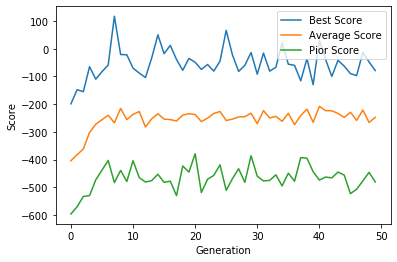

In [69]:
plt.plot(score_best, label="Best Score")
plt.plot(score_aver, label="Average Score")
plt.plot(score_pior, label="Pior Score")
plt.xlabel("Generation")
plt.ylabel("Score")
plt.legend()

print("Melhor individuo", bestInd)

Fazendo um teste como o melhor individuos em 10 testes pra observar qual é o average de meu score com esse individuo. 

In [70]:
dataFile = open('GAindividual_bestMedium.txt', 'w')
dataFile.write(str(bestInd))
dataFile.write("\n")
dataFile.close()

!python3 pacman.py -n 10 -l mediumClassic -p GAagents --agentArgs "tableMode=Medium,f=GAindividual_bestMedium.txt"


layout:  mediumClassic
Pacman died! Score: -57
Pacman died! Score: -326
Pacman died! Score: -380
Pacman died! Score: -175
Pacman died! Score: -230
Pacman died! Score: 40
Pacman died! Score: -187
Pacman died! Score: -364
Pacman died! Score: 167
Pacman died! Score: -264
Average Score: -177.6
Scores:        -57.0, -326.0, -380.0, -175.0, -230.0, 40.0, -187.0, -364.0, 167.0, -264.0
Win Rate:      0/10 (0.00)
Record:        Loss, Loss, Loss, Loss, Loss, Loss, Loss, Loss, Loss, Loss


In [71]:

GA_resultScoreMedium = [-57.0, -326.0, -380.0, -175.0, -230.0, 40.0, -187.0, -364.0, 167.0, -264.0]
GA_resultAvrScoreMeidum = -177.6

## REINFORCEMENT LEARNING


## RESULTADOS

In [48]:
nameFile = "GAindividual.txt"

with open(nameFile, 'w') as f:
    f.write(str(bestInd))
    f.write("\n")

In [105]:
p = !python3 pacman.py -n 1 -l smallClassic -p GAagents --agentArgs "tableMode=Small,f=GAindividual.txt"
p

['layout:  smallClassic',
 "[0, 'd2', 'd1', 2, 2, 'a3', 'a2', 'a1']",
 'Pacman died! Score: -468',
 'Average Score: -468.0',
 'Scores:        -468.0',
 'Win Rate:      0/1 (0.00)',
 'Record:        Loss']